Plots the outputs for each SNP from the ../../results/2018_06_08/snps/ folder. The result is a scatter plot grouped by phewas code on the x-axis and a -log(p_value) on the y-axis.

In [4]:
# Import ggplot2 for graphs, dplyr for dataframes, and stringr for string manipulation.
library(ggplot2)
library(utils)
library(ggrepel)
library(dplyr, warn.conflicts = FALSE)
library(stringr)

In [5]:
# Read in all the SNPs
snps_df <- read.table("../../results/2018_06_08/combined/set_output.csv", sep = '\t')

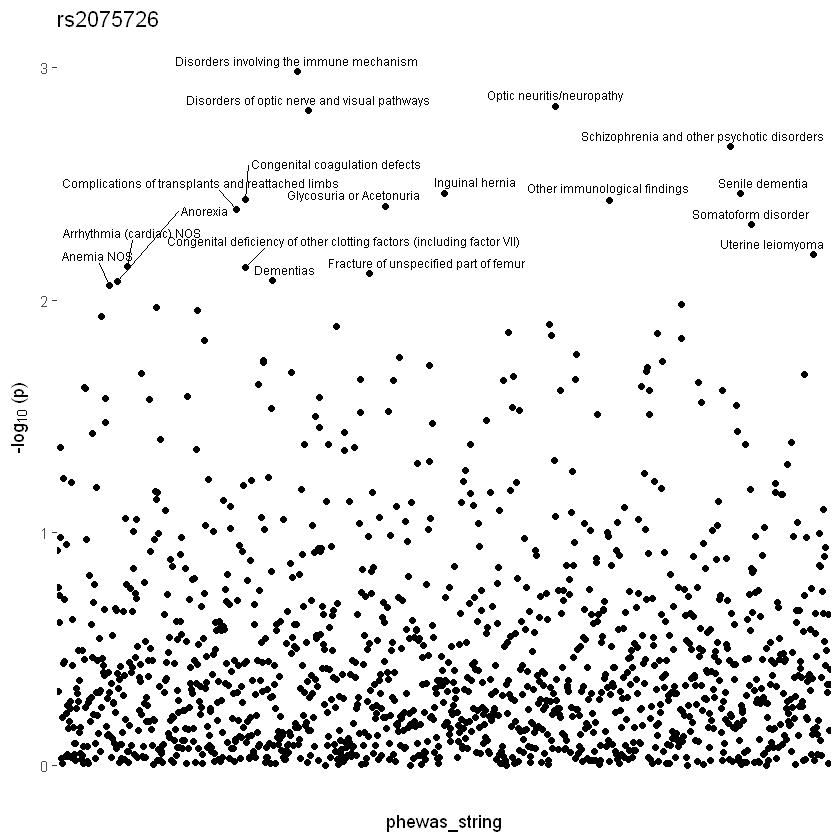

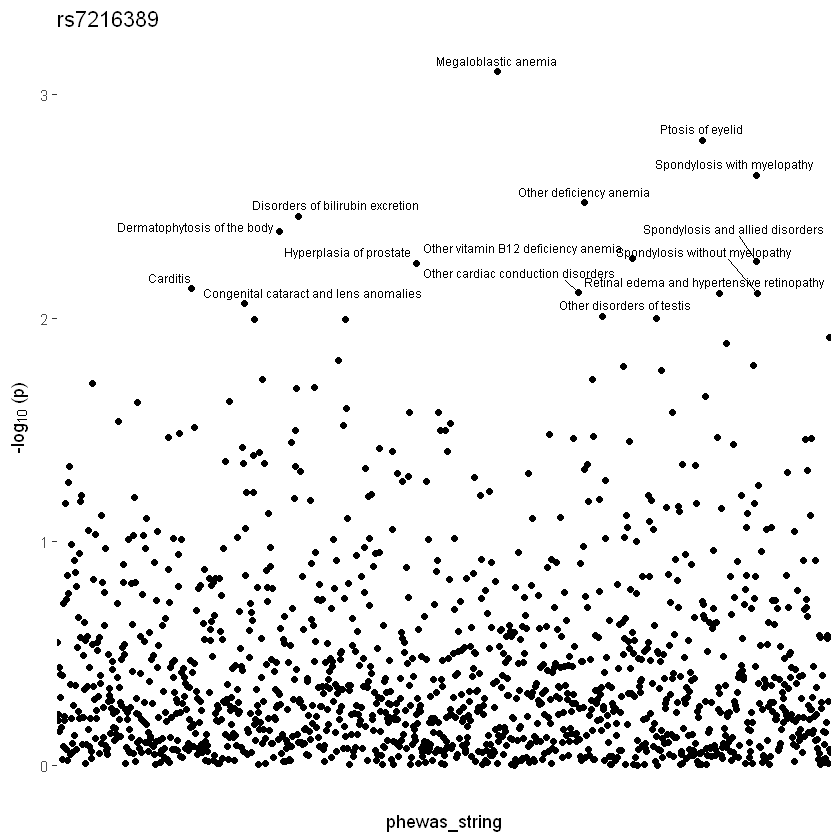

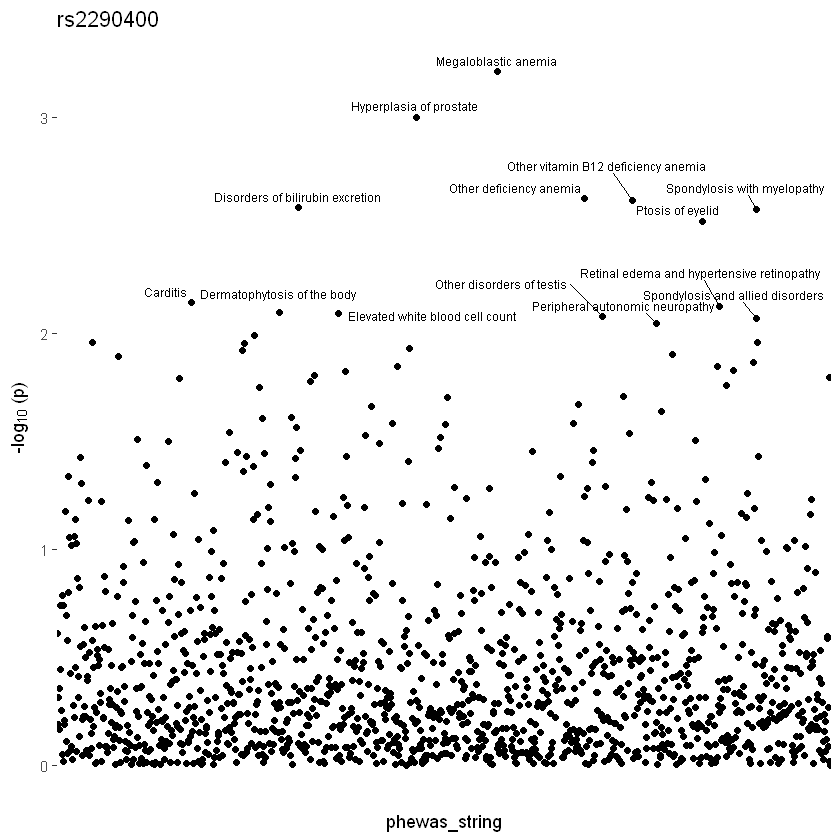

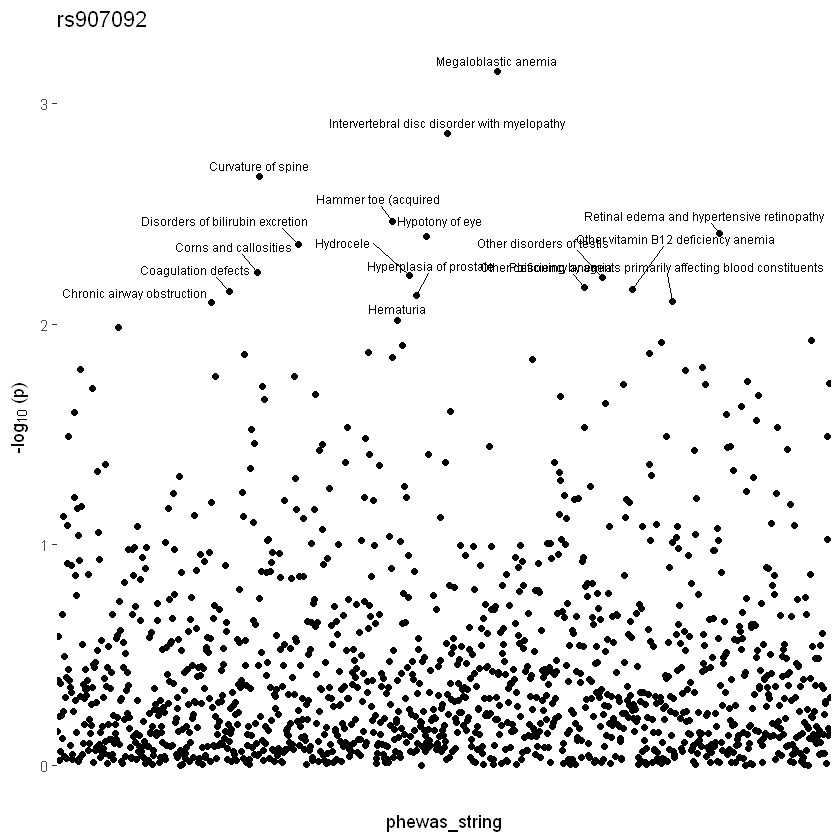

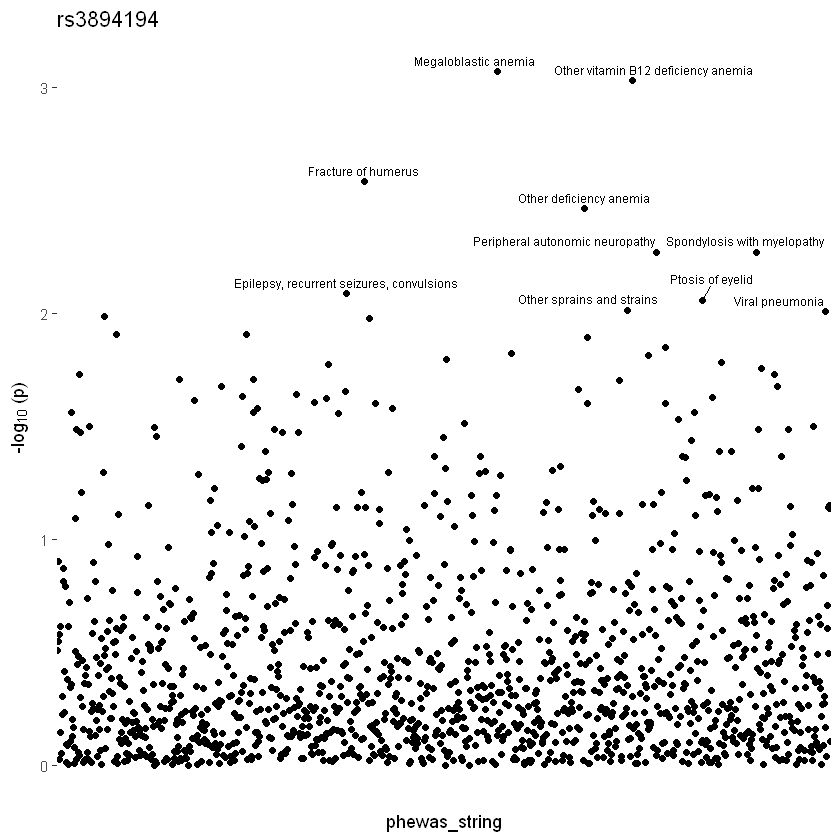

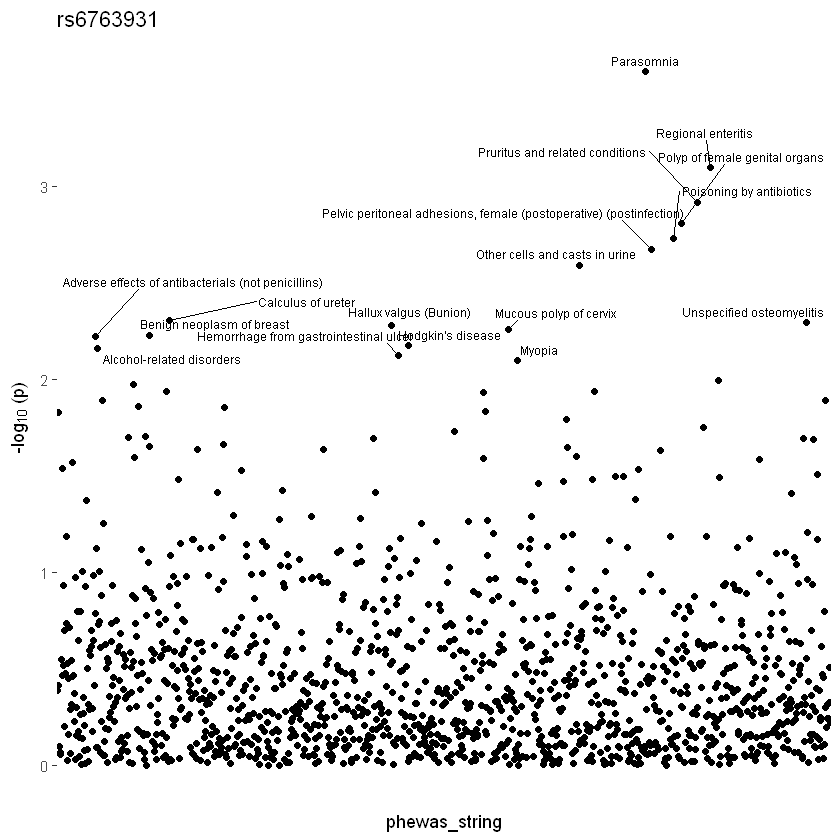

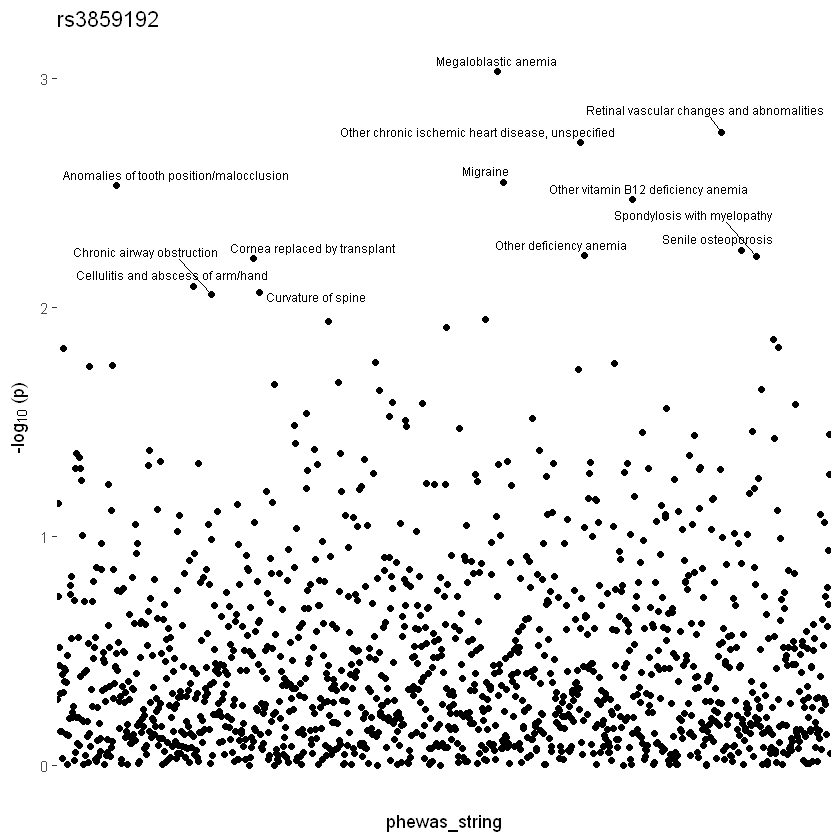

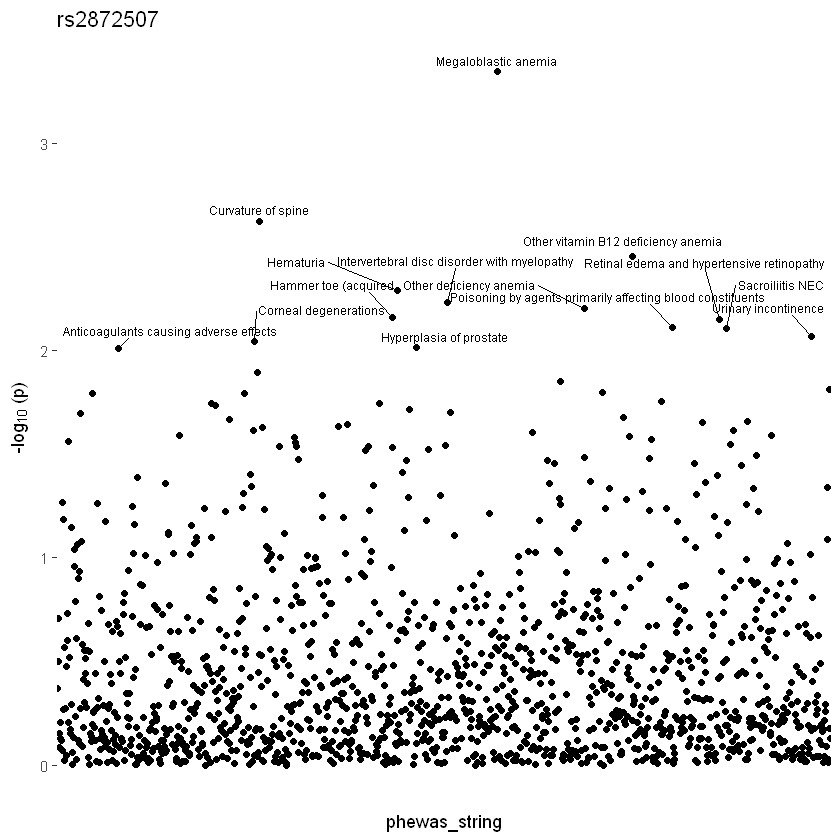

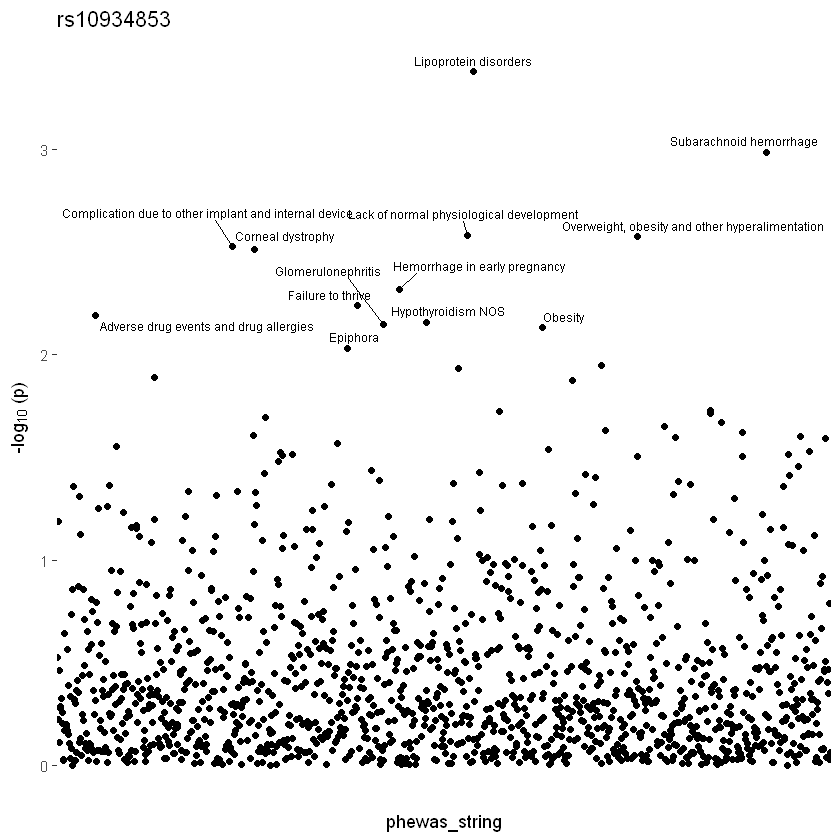

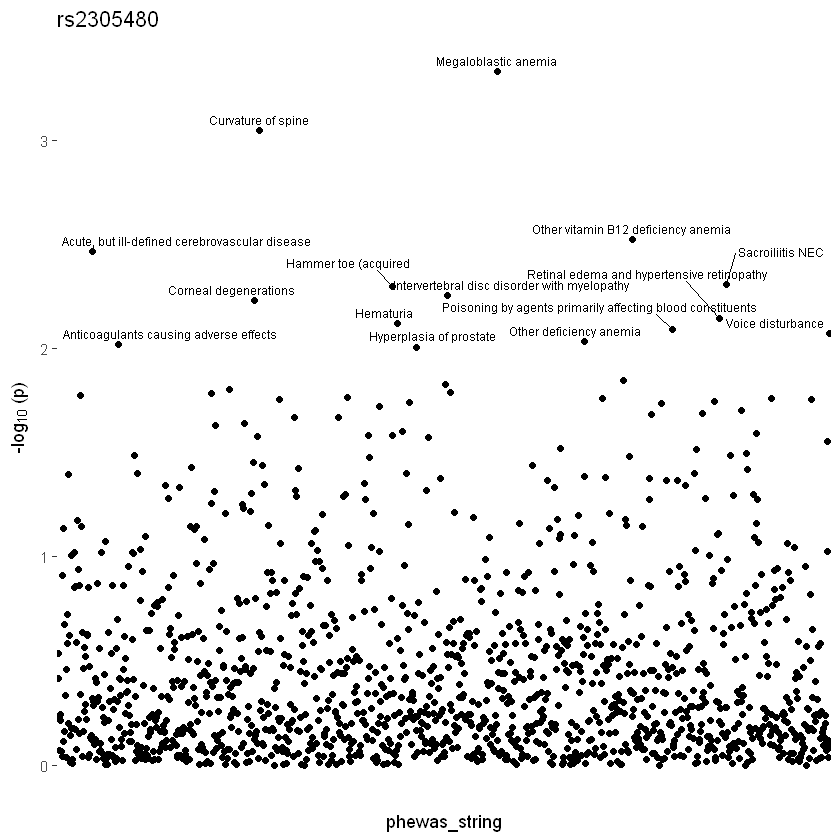

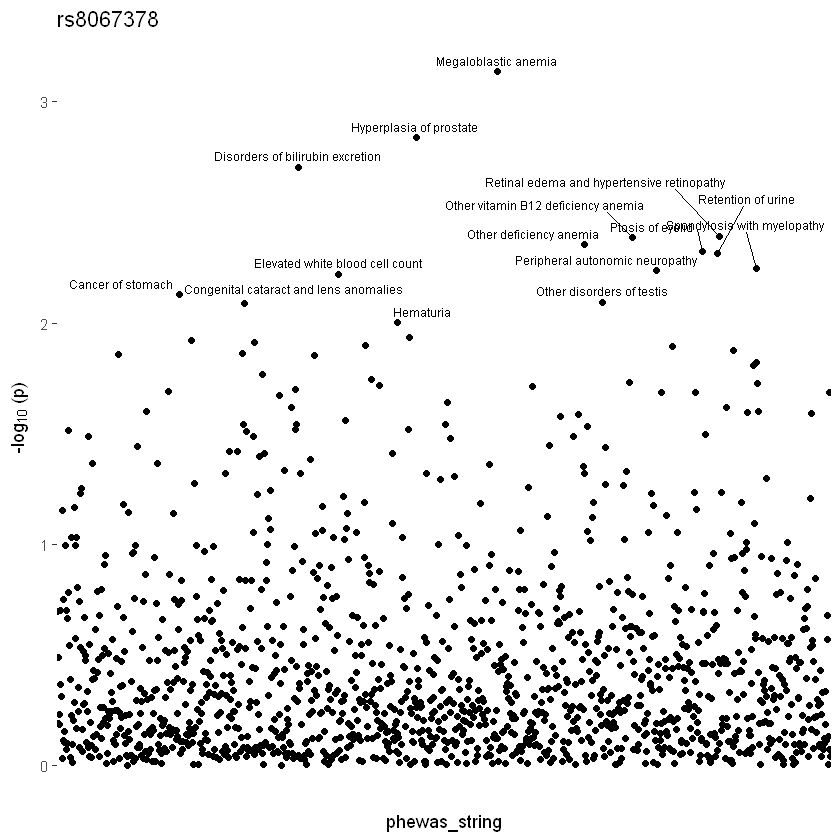

In [6]:
# Iterate over all the SNPs in both the GWAS and PheWAS
for (i in snps_df){
  # Open the files for each SNP.
  cur_snp_str <- paste("../../results/2018_06_08/snps/", i, ".csv", sep = "")
  cur_snp_df <- read.csv(cur_snp_str, sep = '\t')
  
  # Make a copy to take the -log base 10 of the p-values.
  new_df <- cur_snp_df
  new_df[,c("p")] = -log(new_df[,c("p")], 10) 
    
  # Print plot, with points with a -log(p) > 2 labeled with phewas string.
  print(ggplot(new_df, aes(x = phewas_string, y = p)) + 
          geom_point() + 
          labs(y = expression('-log'[10]*' (p)'), title = i) +
          theme(axis.text.x=element_blank(),
                axis.ticks.x=element_blank()) +
          geom_text_repel(
            aes(label = ifelse(p > 2, as.character(phewas_string), '')), 
            size = 2.5,
            hjust = 0.5, 
            vjust = 1,
            force = 2,
            max.iter = 1000))
}